# Surface

In [3]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

<IPython.core.display.Javascript object>


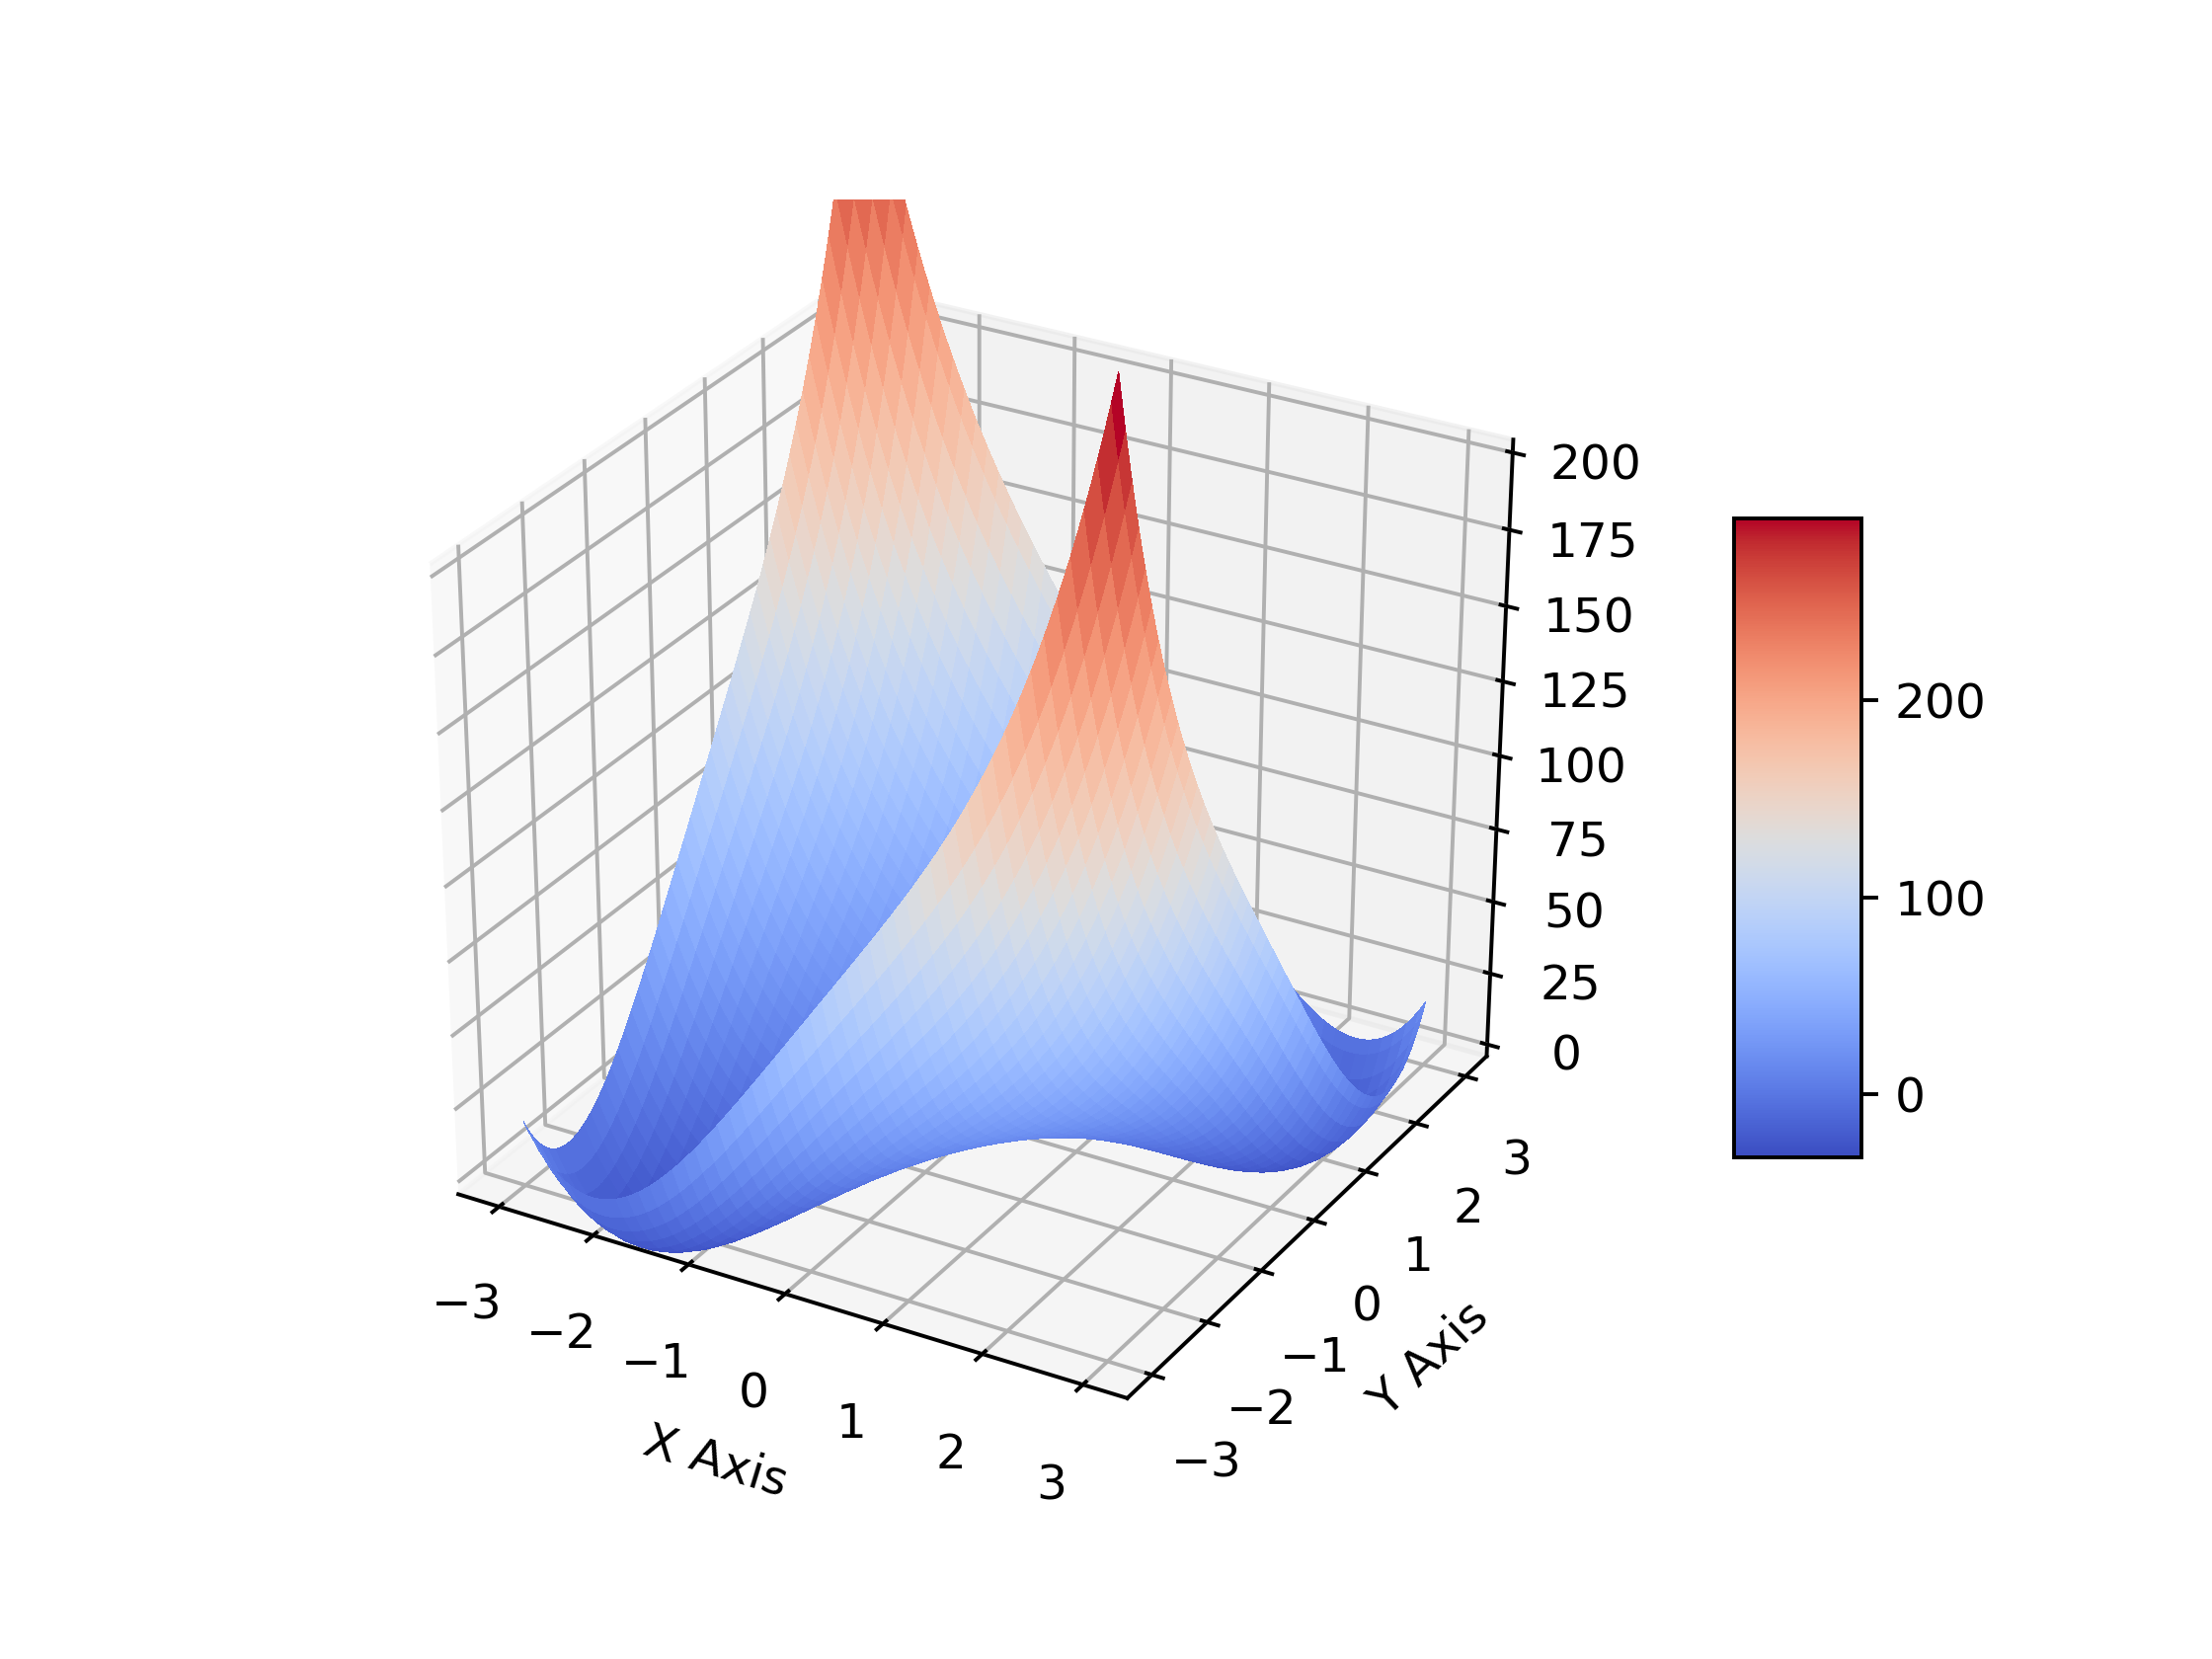

In [11]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x = y = np.linspace(-3,3,100)
X, Y = np.meshgrid(x, y)
Z = X**4+Y**4-16*X*Y

surf = ax.plot_surface(X,Y,Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.set_zlim(0, 200)
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')

plt.show()

## Gradient Descent

In [24]:
def E(u,v):
    return u**4+v**4-16*u*v

eta=0.01
x=1.2; y=1.2
print (0,'\t','x=', x,'\t','y=',y,'\t', 'E=',E(x,y))
for i in range(0,30):
	g=4*x**3-16*y
	h=4*y**3-16*x
	x=x-eta*g
	y=y-eta*h
	print (i+1,'\t','x=',round(x,3),'\t','y=',round(y,3),'\t','E=',round(E(x,y),3))

0 	 x= 1.2 	 y= 1.2 	 E= -18.8928
1 	 x= 1.323 	 y= 1.323 	 E= -21.875
2 	 x= 1.442 	 y= 1.442 	 E= -24.621
3 	 x= 1.553 	 y= 1.553 	 E= -26.95
4 	 x= 1.651 	 y= 1.651 	 E= -28.76
5 	 x= 1.735 	 y= 1.735 	 E= -30.048
6 	 x= 1.804 	 y= 1.804 	 E= -30.889
7 	 x= 1.858 	 y= 1.858 	 E= -31.399
8 	 x= 1.899 	 y= 1.899 	 E= -31.688
9 	 x= 1.929 	 y= 1.929 	 E= -31.843
10 	 x= 1.95 	 y= 1.95 	 E= -31.923
11 	 x= 1.966 	 y= 1.966 	 E= -31.963
12 	 x= 1.976 	 y= 1.976 	 E= -31.982
13 	 x= 1.984 	 y= 1.984 	 E= -31.992
14 	 x= 1.989 	 y= 1.989 	 E= -31.996
15 	 x= 1.992 	 y= 1.992 	 E= -31.998
16 	 x= 1.995 	 y= 1.995 	 E= -31.999
17 	 x= 1.996 	 y= 1.996 	 E= -32.0
18 	 x= 1.998 	 y= 1.998 	 E= -32.0
19 	 x= 1.998 	 y= 1.998 	 E= -32.0
20 	 x= 1.999 	 y= 1.999 	 E= -32.0
21 	 x= 1.999 	 y= 1.999 	 E= -32.0
22 	 x= 1.999 	 y= 1.999 	 E= -32.0
23 	 x= 2.0 	 y= 2.0 	 E= -32.0
24 	 x= 2.0 	 y= 2.0 	 E= -32.0
25 	 x= 2.0 	 y= 2.0 	 E= -32.0
26 	 x= 2.0 	 y= 2.0 	 E= -32.0
27 	 x= 2.0 	 y= 2.0 	 E= -

## Linear Regression Revisited

We will redo the example of multivariate-data in linear regression using gradient descent.

In [6]:
data = np.genfromtxt('../../data/multivar_simulated/data.csv',skip_header=1,delimiter=',')

In [77]:
Y = data[:,1]
X1 = data[:,2:]

In [78]:
O = np.ones(shape=(X.shape[0],1))
X = np.concatenate([X1,O],axis=1)
X.shape

(75, 3)

The error function is given by
$$ E = \sum_{j=1}^{N} (y_j-\sum_{s=1}^{k+1} x_{js}m_{s})^2 .$$

Write a function for $E$.

In [65]:
#def Er(M):
#    formula here
#    return the result

In [79]:
def Er(M):
    F=Y-X@M
    return sum(F*F)

The gradient of $E$ is given by
$$ \nabla E  = -2 X^{\intercal}Y + 2
X^{\intercal}XM. $$

Write a function for $\nabla E$.

In [67]:
#def GE(M):
#    return formula here

In [80]:
def GE(M):
    return -2*X.transpose()@Y+2*X.transpose()@X@M

Choose initial values.

In [70]:
#eta=
#iter_num=
#M=np.array([?,?,?])    

In [81]:
eta=0.0001
iter_num=10000
M=np.array([0,0,0])    

Calculate the initial error.

In [82]:
Er(M)

6199.674559434617

Run a loop for gradient descent and print the values of M and Er(M).

In [1]:
#Write a loop here
#
#print M and Er(M)

In [83]:
for i in range(iter_num):
    M=M-eta*GE(M)
print(M, Er(M))

[ 1.78777492 -3.47899986  6.0608333 ] 77.72956041736886


Compare the result with the previous result from Linear Regression which was 

[ 1.78777492, -3.47899986,  6.0608333 ]



## Newton's Method

In [22]:
def E(u,v):
    return u**4+v**4-16*u*v

eta=1
x=1.2; y=1.2
print (0,'\t','x=', x,'\t','y=',y, '\t','E=',E(x,y))
for i in range(0,10):
	d=9*x**2*y**2-16
	g=(3*x**3*y**2 -8*y**3 -16*x)/d
	h=(3*x**2*y**3 -8*x**3 -16*y)/d
	x=x-eta*g
	y=y-eta*h
	print (i+1,'\t','x=', round(x,3),'\t','y=',round(y,3), '\t','E=',round(E(x,y),3))


0 	 x= 1.2 	 y= 1.2 	 E= -18.8928
1 	 x= 10.8 	 y= 10.8 	 E= 25343.539
2 	 x= 7.283 	 y= 7.283 	 E= 4778.985
3 	 x= 4.981 	 y= 4.981 	 E= 833.891
4 	 x= 3.509 	 y= 3.509 	 E= 106.231
5 	 x= 2.623 	 y= 2.623 	 E= -15.382
6 	 x= 2.169 	 y= 2.169 	 E= -31.005
7 	 x= 2.018 	 y= 2.018 	 E= -31.99
8 	 x= 2.0 	 y= 2.0 	 E= -32.0
9 	 x= 2.0 	 y= 2.0 	 E= -32.0
10 	 x= 2.0 	 y= 2.0 	 E= -32.0


### Haberman's Survival Data Set

https://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

In [14]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [15]:
df=pd.read_csv("../data/haberman.data",header=None)
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [132]:
X

array([[30, 64,  1],
       [30, 62,  3],
       [30, 65,  0],
       [31, 59,  2],
       [31, 65,  4],
       [33, 58, 10],
       [33, 60,  0],
       [34, 59,  0],
       [34, 66,  9],
       [34, 58, 30],
       [34, 60,  1],
       [34, 61, 10],
       [34, 67,  7],
       [34, 60,  0],
       [35, 64, 13],
       [35, 63,  0],
       [36, 60,  1],
       [36, 69,  0],
       [37, 60,  0],
       [37, 63,  0],
       [37, 58,  0],
       [37, 59,  6],
       [37, 60, 15],
       [37, 63,  0],
       [38, 69, 21],
       [38, 59,  2],
       [38, 60,  0],
       [38, 60,  0],
       [38, 62,  3],
       [38, 64,  1],
       [38, 66,  0],
       [38, 66, 11],
       [38, 60,  1],
       [38, 67,  5],
       [39, 66,  0],
       [39, 63,  0],
       [39, 67,  0],
       [39, 58,  0],
       [39, 59,  2],
       [39, 63,  4],
       [40, 58,  2],
       [40, 58,  0],
       [40, 65,  0],
       [41, 60, 23],
       [41, 64,  0],
       [41, 67,  0],
       [41, 58,  0],
       [41, 5

### Scaling Features

As you can see the data from various columns have various value ranges. Having the features in same range makes the algorithm to converge faster than using the features which are not scaled to be in same range.

In [3]:
from sklearn.preprocessing import MinMaxScaler
numcols=[0,1,2]
mms=MinMaxScaler()
X=mms.fit_transform(df[numcols])

In [4]:
X

array([[0.        , 0.54545455, 0.01923077],
       [0.        , 0.36363636, 0.05769231],
       [0.        , 0.63636364, 0.        ],
       [0.01886792, 0.09090909, 0.03846154],
       [0.01886792, 0.63636364, 0.07692308],
       [0.05660377, 0.        , 0.19230769],
       [0.05660377, 0.18181818, 0.        ],
       [0.0754717 , 0.09090909, 0.        ],
       [0.0754717 , 0.72727273, 0.17307692],
       [0.0754717 , 0.        , 0.57692308],
       [0.0754717 , 0.18181818, 0.01923077],
       [0.0754717 , 0.27272727, 0.19230769],
       [0.0754717 , 0.81818182, 0.13461538],
       [0.0754717 , 0.18181818, 0.        ],
       [0.09433962, 0.54545455, 0.25      ],
       [0.09433962, 0.45454545, 0.        ],
       [0.11320755, 0.18181818, 0.01923077],
       [0.11320755, 1.        , 0.        ],
       [0.13207547, 0.18181818, 0.        ],
       [0.13207547, 0.45454545, 0.        ],
       [0.13207547, 0.        , 0.        ],
       [0.13207547, 0.09090909, 0.11538462],
       [0.

### Splitting the data

We split the data set into two parts: one for train and the other for test.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(214, 3) (214,)
(92, 3) (92,)


We add one column consisting of ones.

In [17]:
n_train=len(y_train)
new_col=np.ones((n_train,1))
X_train_modified=np.append(X_train,new_col,1)

In [18]:
X_train_modified

array([[54., 65.,  5.,  1.],
       [60., 67.,  2.,  1.],
       [72., 67.,  3.,  1.],
       [56., 66.,  3.,  1.],
       [49., 64., 10.,  1.],
       [56., 60.,  0.,  1.],
       [49., 61.,  1.,  1.],
       [66., 58.,  0.,  1.],
       [73., 62.,  0.,  1.],
       [52., 60.,  4.,  1.],
       [67., 65.,  0.,  1.],
       [54., 58.,  1.,  1.],
       [34., 67.,  7.,  1.],
       [70., 58.,  0.,  1.],
       [58., 58.,  0.,  1.],
       [34., 60.,  0.,  1.],
       [42., 59.,  2.,  1.],
       [39., 67.,  0.,  1.],
       [49., 61.,  0.,  1.],
       [65., 59.,  2.,  1.],
       [43., 63., 14.,  1.],
       [50., 64.,  0.,  1.],
       [55., 63.,  6.,  1.],
       [61., 65.,  0.,  1.],
       [52., 65.,  0.,  1.],
       [67., 64.,  8.,  1.],
       [52., 61.,  0.,  1.],
       [48., 58., 11.,  1.],
       [52., 62.,  0.,  1.],
       [70., 66., 14.,  1.],
       [52., 62.,  1.,  1.],
       [69., 65.,  0.,  1.],
       [66., 68.,  0.,  1.],
       [54., 65., 23.,  1.],
       [45., 6

In [19]:
n_test=len(y_test)
new_col=np.ones((n_test,1))
X_test_modified=np.append(X_test,new_col,1)

Define the function $\sigma(x) = \dfrac {e^x}{e^x+1}= \dfrac 1 {1+e^{-x}}$.

In [91]:
#def sigmoid(x):    
#    return the function

In [20]:
def sigmoid(x):    
    return 1/ (1 + np.exp(-x))

Define the error function
$$ E (\mathbf{w}) = - \frac 1 N \sum_{n=1}^N \{ t_n \ln y_n + (1-t_n) \ln (1-y_n)\},  $$
where $y_n=\sigma(w_1 x_{n1}+ w_2 x_{n2} + \cdots + w_k x_{nk}+w_{k+1} )$. This function will be obtained in Logistic Regression.

In [86]:
#def Er(w):
#    yn=
#    return ???

In [21]:
def Er(w):
    yn=sigmoid(X_train_modified@w)
    return -(1/n_train)*sum((2-y_train).reshape(n_train,1)*np.log(yn)\
             +(y_train-1).reshape(n_train,1)*np.log(1-yn))

In [29]:
w=np.array([0,0,0,0])
Er(w)

array([0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314718,
       0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314718,
       0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314718,
       0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314718,
       0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314718,
       0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314718,
       0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314718,
       0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314718,
       0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314718,
       0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314718,
       0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314718,
       0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314718,
       0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314718,
       0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314718,
       0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314

In [30]:
w=[[0],[0],[0],[0]]
Er(w)

array([0.69314718])

Define the gradient of $E$.

In [85]:
#def gradE(w):
#    return the function

In [22]:
def gradE(ww):
    yw=sigmoid(X_train_modified@ww)
    return (y_train+(yw-2).reshape(1,n_train))[0]@X_train_modified/n_train


In [31]:
gradE(w)

array([-12.05607477, -14.63551402,  -0.19392523,  -0.23364486])

Set the initial values.

In [ ]:
#w=[[?],[?],[?],[?]]
#eta=
#iter_num=

In [25]:
w=[[0],[0],[0],[0]]
eta=0.0005
iter_num=10000

Run a loop for gradient descent.

In [1]:
#for i in range(iter_num):
#

In [26]:
for i in range(iter_num):
    w=w-eta*gradE(w).reshape(4,1)
    if i%1000==0:
        print(w,Er(w))

[[6.02803738e-03]
 [7.31775701e-03]
 [9.69626168e-05]
 [1.16822430e-04]] [0.5873878]
[[-0.01200184]
 [ 0.03214103]
 [-0.08492665]
 [ 0.00111861]] [0.54810746]
[[-0.01241907]
 [ 0.03261406]
 [-0.08660237]
 [ 0.00176359]] [0.54809389]
[[-0.01242904]
 [ 0.03261528]
 [-0.08664009]
 [ 0.00240146]] [0.54809307]
[[-0.01242977]
 [ 0.03260581]
 [-0.08664091]
 [ 0.00303902]] [0.54809226]
[[-0.01243028]
 [ 0.0325961 ]
 [-0.08664089]
 [ 0.00367644]] [0.54809145]
[[-0.01243078]
 [ 0.03258638]
 [-0.08664085]
 [ 0.00431372]] [0.54809064]
[[-0.01243129]
 [ 0.03257667]
 [-0.08664081]
 [ 0.00495085]] [0.54808982]
[[-0.01243179]
 [ 0.03256696]
 [-0.08664077]
 [ 0.00558784]] [0.54808901]
[[-0.0124323 ]
 [ 0.03255725]
 [-0.08664074]
 [ 0.00622468]] [0.5480882]


In [27]:
print(w)

[[-0.0124328 ]
 [ 0.03254756]
 [-0.0866407 ]
 [ 0.00686074]]


We compute the accuracy of the trained model.

In [28]:
y_pred=(sigmoid(X_test_modified@w).round()).reshape([1,n_test])
y_test=y_test%2
print("TraiWe compute the accuracy of the trained model.n Accuracy:", sum(y_test==y_pred[0])*100/n_test,"%")

TraiWe compute the accuracy of the trained model.n Accuracy: 76.08695652173913 %
